# Problem Statement: Predictive Analytics for Chronic Kidney Disease Detection

## Context
In healthcare operations, early detection of chronic diseases can significantly reduce mortality rates, improve patient outcomes, and decrease healthcare costs. Chronic Kidney Disease (CKD) is a silent epidemic affecting over **850 million people worldwide**, often progressing asymptomatically until advanced stages when treatment options become limited.

Routine laboratory tests provide critical signals for early detection, but interpreting complex patterns across multiple biomarkers requires specialized expertise and time.  
The objective of this project is to design a **predictive analytics system** using the **Chronic Kidney Disease (CKD) Dataset**, which contains multivariate clinical laboratory measurements from real patients, including blood tests, urine analysis, and clinical parameters collected until diagnosis.

---

## Dataset Overview
- **Total Attributes:** 25  
- **Features:** 24  
- **Target Variable:** 1 (Class)  
- **Numerical Attributes:** 11  
- **Nominal Attributes:** 14  

---

## Attribute Information

| No. | Attribute Name | Symbol | Type | Description / Values |
|----:|---------------|--------|------|----------------------|
| 1 | Age | age | Numerical | Age in years |
| 2 | Blood Pressure | bp | Numerical | Blood pressure in mm/Hg |
| 3 | Specific Gravity | sg | Nominal | (1.005, 1.010, 1.015, 1.020, 1.025) |
| 4 | Albumin | al | Nominal | (0, 1, 2, 3, 4, 5) |
| 5 | Sugar | su | Nominal | (0, 1, 2, 3, 4, 5) |
| 6 | Red Blood Cells | rbc | Nominal | (normal, abnormal) |
| 7 | Pus Cell | pc | Nominal | (normal, abnormal) |
| 8 | Pus Cell Clumps | pcc | Nominal | (present, notpresent) |
| 9 | Bacteria | ba | Nominal | (present, notpresent) |
| 10 | Blood Glucose Random | bgr | Numerical | Blood glucose in mgs/dl |
| 11 | Blood Urea | bu | Numerical | Blood urea in mgs/dl |
| 12 | Serum Creatinine | sc | Numerical | Serum creatinine in mgs/dl |
| 13 | Sodium | sod | Numerical | Sodium in mEq/L |
| 14 | Potassium | pot | Numerical | Potassium in mEq/L |
| 15 | Hemoglobin | hemo | Numerical | Hemoglobin in gms |
| 16 | Packed Cell Volume | pcv | Numerical | Volume percentage of red blood cells |
| 17 | White Blood Cell Count | wc | Numerical | Cells per cumm |
| 18 | Red Blood Cell Count | rc | Numerical | Millions per cmm |
| 19 | Hypertension | htn | Nominal | (yes, no) |
| 20 | Diabetes Mellitus | dm | Nominal | (yes, no) |
| 21 | Coronary Artery Disease | cad | Nominal | (yes, no) |
| 22 | Appetite | appet | Nominal | (good, poor) |
| 23 | Pedal Edema | pe | Nominal | (yes, no) |
| 24 | Anemia | ane | Nominal | (yes, no) |
| 25 | Class (Target) | class | Nominal | (ckd, notckd) |

---

## Objective
To build a machine learning–based predictive model that accurately classifies patients as **CKD** or **Non-CKD**, enabling early diagnosis and supporting clinical decision-making.


## Importing Required Libraries

In [1]:
import numpy as np # numerical operations
import pandas as pd # handling datasets
from ucimlrepo import fetch_ucirepo # easily import datasets
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns # high end plots 
import math # mathematical equations
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336)

#  data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# concatenate the X & y features
df = pd.concat([X, y], axis=1)

In [4]:
# view first 5 rows from the dataframe
df.head().T

0           1           2           3           4
age          48.0         7.0        62.0        48.0        51.0
bp           80.0        50.0        80.0        70.0        80.0
sg           1.02        1.02        1.01       1.005        1.01
al            1.0         4.0         2.0         4.0         2.0
su            0.0         0.0         3.0         0.0         0.0
rbc           NaN         NaN      normal      normal      normal
pc         normal      normal      normal    abnormal      normal
pcc    notpresent  notpresent  notpresent     present  notpresent
ba     notpresent  notpresent  notpresent  notpresent  notpresent
bgr         121.0         NaN       423.0       117.0       106.0
bu           36.0        18.0        53.0        56.0        26.0
sc            1.2         0.8         1.8         3.8         1.4
sod           NaN         NaN         NaN       111.0         NaN
pot           NaN         NaN         NaN         2.5         NaN
hemo         15.4        11.3         9.6        11.2        11.6
pcv          44.0        38.0        31.0        32.0        35.0
wbcc       7800.0      6000.0      7500.0      6700.0      7300.0
rbcc          5.2         NaN         NaN         3.9         4.6
htn           yes          no          no         yes          no
dm            yes          no         yes          no          no
cad            no          no          no          no          no
appet        good        good        poor        poor        good
pe             no          no          no         yes          no
ane            no          no         yes         yes          no
class         ckd         ckd         ckd         ckd         ckd

In [5]:
# rename the columns for easier understanding
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [7]:
# replace '\tno' to 'no' in dm
df['diabetes_mellitus'] = df['diabetes_mellitus'].str.replace('\tno', 'no', regex=False)
# replace 'ckd\t' to 'ckd' in class
df['class'] = df['class'].str.replace('ckd\t', 'ckd', regex=False)

In [8]:
# change the datatypes to 'category'
df['specific_gravity'] = df['specific_gravity'].astype('category')
df['albumin'] = df['albumin'].astype('category')
df['sugar'] = df['sugar'].astype('category')
df['red_blood_cells'] = df['red_blood_cells'].astype('category')
df['pus_cell'] = df['pus_cell'].astype('category')
df['pus_cell_clumps'] = df['pus_cell_clumps'].astype('category')
df['bacteria'] = df['bacteria'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['diabetes_mellitus'] = df['diabetes_mellitus'].astype('category')
df['coronary_artery_disease'] = df['coronary_artery_disease'].astype('category')
df['appetite'] = df['appetite'].astype('category')
df['peda_edema'] = df['peda_edema'].astype('category')
df['aanemia'] = df['aanemia'].astype('category')
df['class'] = df['class'].astype('category')

In [9]:
# description of numerical data
df.describe()

age  blood_pressure  blood_glucose_random  blood_urea  \
count  391.000000      388.000000            356.000000  381.000000   
mean    51.483376       76.469072            148.036517   57.425722   
std     17.169714       13.683637             79.281714   50.503006   
min      2.000000       50.000000             22.000000    1.500000   
25%     42.000000       70.000000             99.000000   27.000000   
50%     55.000000       80.000000            121.000000   42.000000   
75%     64.500000       80.000000            163.000000   66.000000   
max     90.000000      180.000000            490.000000  391.000000   

       serum_creatinine      sodium   potassium  haemoglobin  \
count        383.000000  313.000000  312.000000   348.000000   
mean           3.072454  137.528754    4.627244    12.526437   
std            5.741126   10.408752    3.193904     2.912587   
min            0.400000    4.500000    2.500000     3.100000   
25%            0.900000  135.000000    3.800000    10.300000   
50%            1.300000  138.000000    4.400000    12.650000   
75%            2.800000  142.000000    4.900000    15.000000   
max           76.000000  163.000000   47.000000    17.800000   

       packed_cell_volume  white_blood_cell_count  red_blood_cell_count  
count          329.000000              294.000000            269.000000  
mean            38.884498             8406.122449              4.707435  
std              8.990105             2944.474190              1.025323  
min              9.000000             2200.000000              2.100000  
25%             32.000000             6500.000000              3.900000  
50%             40.000000             8000.000000              4.800000  
75%             45.000000             9800.000000              5.400000  
max             54.000000            26400.000000              8.000000

In [11]:
# check for the missing values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [12]:
# check for duplicates
df.duplicated().sum()

0

In [13]:
def categorical_counts(cat_cols):
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts(dropna=False))
        print("-" * 30)

cate_list = [
    'specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
    'hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia','class'
]

categorical_counts(cate_list)



Column: specific_gravity
specific_gravity
1.02     106
1.01      84
1.025     81
1.015     75
NaN       47
1.005      7
Name: count, dtype: int64
------------------------------

Column: albumin
albumin
0.0    199
NaN     46
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
------------------------------

Column: sugar
sugar
0.0    290
NaN     49
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: count, dtype: int64
------------------------------

Column: red_blood_cells
red_blood_cells
normal      201
NaN         152
abnormal     47
Name: count, dtype: int64
------------------------------

Column: pus_cell
pus_cell
normal      259
abnormal     76
NaN          65
Name: count, dtype: int64
------------------------------

Column: pus_cell_clumps
pus_cell_clumps
notpresent    354
present        42
NaN             4
Name: count, dtype: int64
------------------------------

Column: bacteria
bacteria
notpresent    374
present        22
NaN            

In [14]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
haemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
diabetes_mellitus : 2 values
coronary_artery_disease : 2 values
appetite : 2 values
peda_edema : 2 values
aanemia : 2 values
class : 2 values


## EDA

In [15]:
def summary_plotly(x):
    data = df[x]

    # ----------- Summary Statistics -----------
    x_min = data.min()
    x_max = data.max()
    Q1 = data.quantile(0.25)
    Q2 = data.quantile(0.50)
    Q3 = data.quantile(0.75)
    mean = data.mean()

    print(f'5 Point Summary (+ Mean) of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()} (min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2 (Median)           : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()} (max) : {x_max}\n'
          f'Mean                  : {mean:.2f}\n')

    # Clean data only for plotting math
    clean_data = data.dropna()

    # ----------- KDE -----------
    kde = gaussian_kde(clean_data)
    x_range = np.linspace(clean_data.min(), clean_data.max(), 500)
    kde_values = kde(x_range)

    # ----------- Scale KDE to match histogram -----------
    bins = 30
    bin_width = (clean_data.max() - clean_data.min()) / bins
    kde_scaled = kde_values * len(clean_data) * bin_width

    # ----------- CDF -----------
    sorted_data = np.sort(clean_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # ----------- Subplots -----------
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            f'{x.capitalize()} Histogram + KDE',
            f'{x.capitalize()} Violin Plot',
            f'{x.capitalize()} Box Plot',
            f'{x.capitalize()} Cumulative Distribution'
        ]
    )

    # Histogram
    fig.add_trace(
        go.Histogram(
            x=clean_data,
            nbinsx=bins,
            name="Histogram"
        ),
        row=1, col=1
    )

    # KDE curve
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=kde_scaled,
            mode='lines',
            name="Density Curve"
        ),
        row=1, col=1
    )

    # Violin
    fig.add_trace(
        go.Violin(
            x=clean_data,
            box_visible=True,
            meanline_visible=True,
            name="Violin"
        ),
        row=1, col=2
    )

    # Box
    fig.add_trace(
        go.Box(
            x=clean_data,
            name="Box"
        ),
        row=2, col=1
    )

    # CDF
    fig.add_trace(
        go.Scatter(
            x=sorted_data,
            y=cdf,
            mode='lines',
            name="CDF"
        ),
        row=2, col=2
    )

    fig.update_layout(
        height=850,
        width=1200,
        title_text=f"Statistical Summary & Distribution of {x.capitalize()}",
        showlegend=False
    )

    fig.show()


In [16]:
summary_plotly('age')

5 Point Summary (+ Mean) of Age Attribute:
Age (min) : 2.0
Q1                    : 42.0
Q2 (Median)           : 55.0
Q3                    : 64.5
Age (max) : 90.0
Mean                  : 51.48



In [17]:
summary_plotly('blood_pressure')

5 Point Summary (+ Mean) of Blood_pressure Attribute:
Blood_pressure (min) : 50.0
Q1                    : 70.0
Q2 (Median)           : 80.0
Q3                    : 80.0
Blood_pressure (max) : 180.0
Mean                  : 76.47



In [18]:
summary_plotly('blood_glucose_random')

5 Point Summary (+ Mean) of Blood_glucose_random Attribute:
Blood_glucose_random (min) : 22.0
Q1                    : 99.0
Q2 (Median)           : 121.0
Q3                    : 163.0
Blood_glucose_random (max) : 490.0
Mean                  : 148.04



In [19]:
summary_plotly('blood_urea')

5 Point Summary (+ Mean) of Blood_urea Attribute:
Blood_urea (min) : 1.5
Q1                    : 27.0
Q2 (Median)           : 42.0
Q3                    : 66.0
Blood_urea (max) : 391.0
Mean                  : 57.43



In [20]:
summary_plotly('serum_creatinine')

5 Point Summary (+ Mean) of Serum_creatinine Attribute:
Serum_creatinine (min) : 0.4
Q1                    : 0.9
Q2 (Median)           : 1.3
Q3                    : 2.8
Serum_creatinine (max) : 76.0
Mean                  : 3.07



In [21]:
summary_plotly('sodium')

5 Point Summary (+ Mean) of Sodium Attribute:
Sodium (min) : 4.5
Q1                    : 135.0
Q2 (Median)           : 138.0
Q3                    : 142.0
Sodium (max) : 163.0
Mean                  : 137.53



In [22]:
summary_plotly('potassium')

5 Point Summary (+ Mean) of Potassium Attribute:
Potassium (min) : 2.5
Q1                    : 3.8
Q2 (Median)           : 4.4
Q3                    : 4.9
Potassium (max) : 47.0
Mean                  : 4.63



In [23]:
summary_plotly('haemoglobin')

5 Point Summary (+ Mean) of Haemoglobin Attribute:
Haemoglobin (min) : 3.1
Q1                    : 10.3
Q2 (Median)           : 12.649999999999999
Q3                    : 15.0
Haemoglobin (max) : 17.8
Mean                  : 12.53



In [24]:
summary_plotly('packed_cell_volume')

5 Point Summary (+ Mean) of Packed_cell_volume Attribute:
Packed_cell_volume (min) : 9.0
Q1                    : 32.0
Q2 (Median)           : 40.0
Q3                    : 45.0
Packed_cell_volume (max) : 54.0
Mean                  : 38.88



In [25]:
summary_plotly('white_blood_cell_count')

5 Point Summary (+ Mean) of White_blood_cell_count Attribute:
White_blood_cell_count (min) : 2200.0
Q1                    : 6500.0
Q2 (Median)           : 8000.0
Q3                    : 9800.0
White_blood_cell_count (max) : 26400.0
Mean                  : 8406.12



In [26]:
summary_plotly('red_blood_cell_count')

5 Point Summary (+ Mean) of Red_blood_cell_count Attribute:
Red_blood_cell_count (min) : 2.1
Q1                    : 3.9
Q2 (Median)           : 4.8
Q3                    : 5.4
Red_blood_cell_count (max) : 8.0
Mean                  : 4.71



* **There is skewness in the parameters with respect to histogram**
* **Violin plot describe the maximum postion of dataset suitated. The spread of the data.**
* **There are lot of outliers in the data as we can see from the plots. Box plot helps to identify the outliers.**
* **Cummulative distribution shows the data acumulated over time.**

### Bivariate analysis

In [27]:
def scatter_plot(x, y):
    fig = px.scatter(
        df, x=x, y=y, color='class',
        title=f'{x} vs {y}',
        opacity=0.9
    )
    fig.show()

In [28]:
scatter_plot('haemoglobin', 'packed_cell_volume')

* **There is high correlation among packed cell volume and haemoglobin**

In [29]:
scatter_plot('serum_creatinine', 'blood_urea')

* **As the blood urea increases serun creatinine increases there is linear relationship as both increases chances of having CKD increases.**

In [30]:
scatter_plot('blood_urea', 'haemoglobin')

* **Hemoglobin decreases as blood urea increases for CKD patients.**

In [31]:
scatter_plot('serum_creatinine', 'potassium')

* **As serum creatinine increases the chances of getting CKD increases.**

In [32]:
scatter_plot('haemoglobin', 'potassium')

* **We can see that for CKD patients haemoglobin is low while potassium is same. In this plot you can see the line between CKD and notCKD patients, i.e patient having haemoglobin less than 13, there are high chance of having CKD.**

In [33]:
df['eGFR'] = 186 * (df['serum_creatinine'] ** -1.154) * (df['age'] ** -0.203)

In [34]:
num_cols = [
    'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
    'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
    'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count','eGFR'
]

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[f'{col} vs CKD' for col in num_cols]
)

count = 0
for i, col in enumerate(num_cols):
    row = (i // n_cols) + 1
    col_pos = (i % n_cols) + 1

    fig.add_trace(
        go.Box(
            x=df['class'],
            y=df[col],
            boxmean=True,
            name=col
        ),
        row=row, col=col_pos
    )

fig.update_layout(
    height=350 * n_rows,
    width=1200,
    showlegend=False,
    title_text="Bivariate Analysis: Numerical Features vs CKD Class"
)

fig.show()

* **Plot_1 age vs CKD, older people have high chance of getting CKD. There are outliers in the plot which might state there are chances of people might have CKD, because of deformilities from Birth**
* **Plot_2 blood_pressure vs CKD, the range is normal for both CKD and Not CKD patients**
* **Plot_3 blood_glucose_random vs CKD, there is a spike in Blood Glucose Random for CKD patients. There are outliers in this plot**
* **Plot_4 blood_urea vs CKD, Blood Urea is unusual for CKD patients. Outliers are present**
* **Plot_5 serum_creatinine vs CKD, Serum Creatinine is high for CKD patients. As sc increses higher the risk of having CKD**
* **Plot_6 sodium vs CKD, the variance of sodium in CKD patients are high as compared to notCKD. There are outliers in CKD class**
* **Plot_7 potassium vs CKD, not much spead in the data of Potassium in CKD and notCKD patient. Outliers are present in CKD class**
* **Plot_8 hemoglobin vs CKD, Hemoglobin is low in CKD patients as compared to notCKD. There are outliers in CKD class**
* **Plot_9 packed_cell_volume vs CKD, Packed Cell Volume is low in CKD patients. Few outliers are present.**
* **Plot_10 white_blood_cell_count vs CKD, White Blood Cell Count has shown increase in spread. Many outliers are present in CKD class**
* **Plot_11 red_blood_cell_count vs CKD, Red Blood Cell Count has decrease in CKD class. Few outliers are present.**
* **Plot_12 eGFR vs CKD, eGFR levels are low to CKD patients as compared to notCKD patients.**

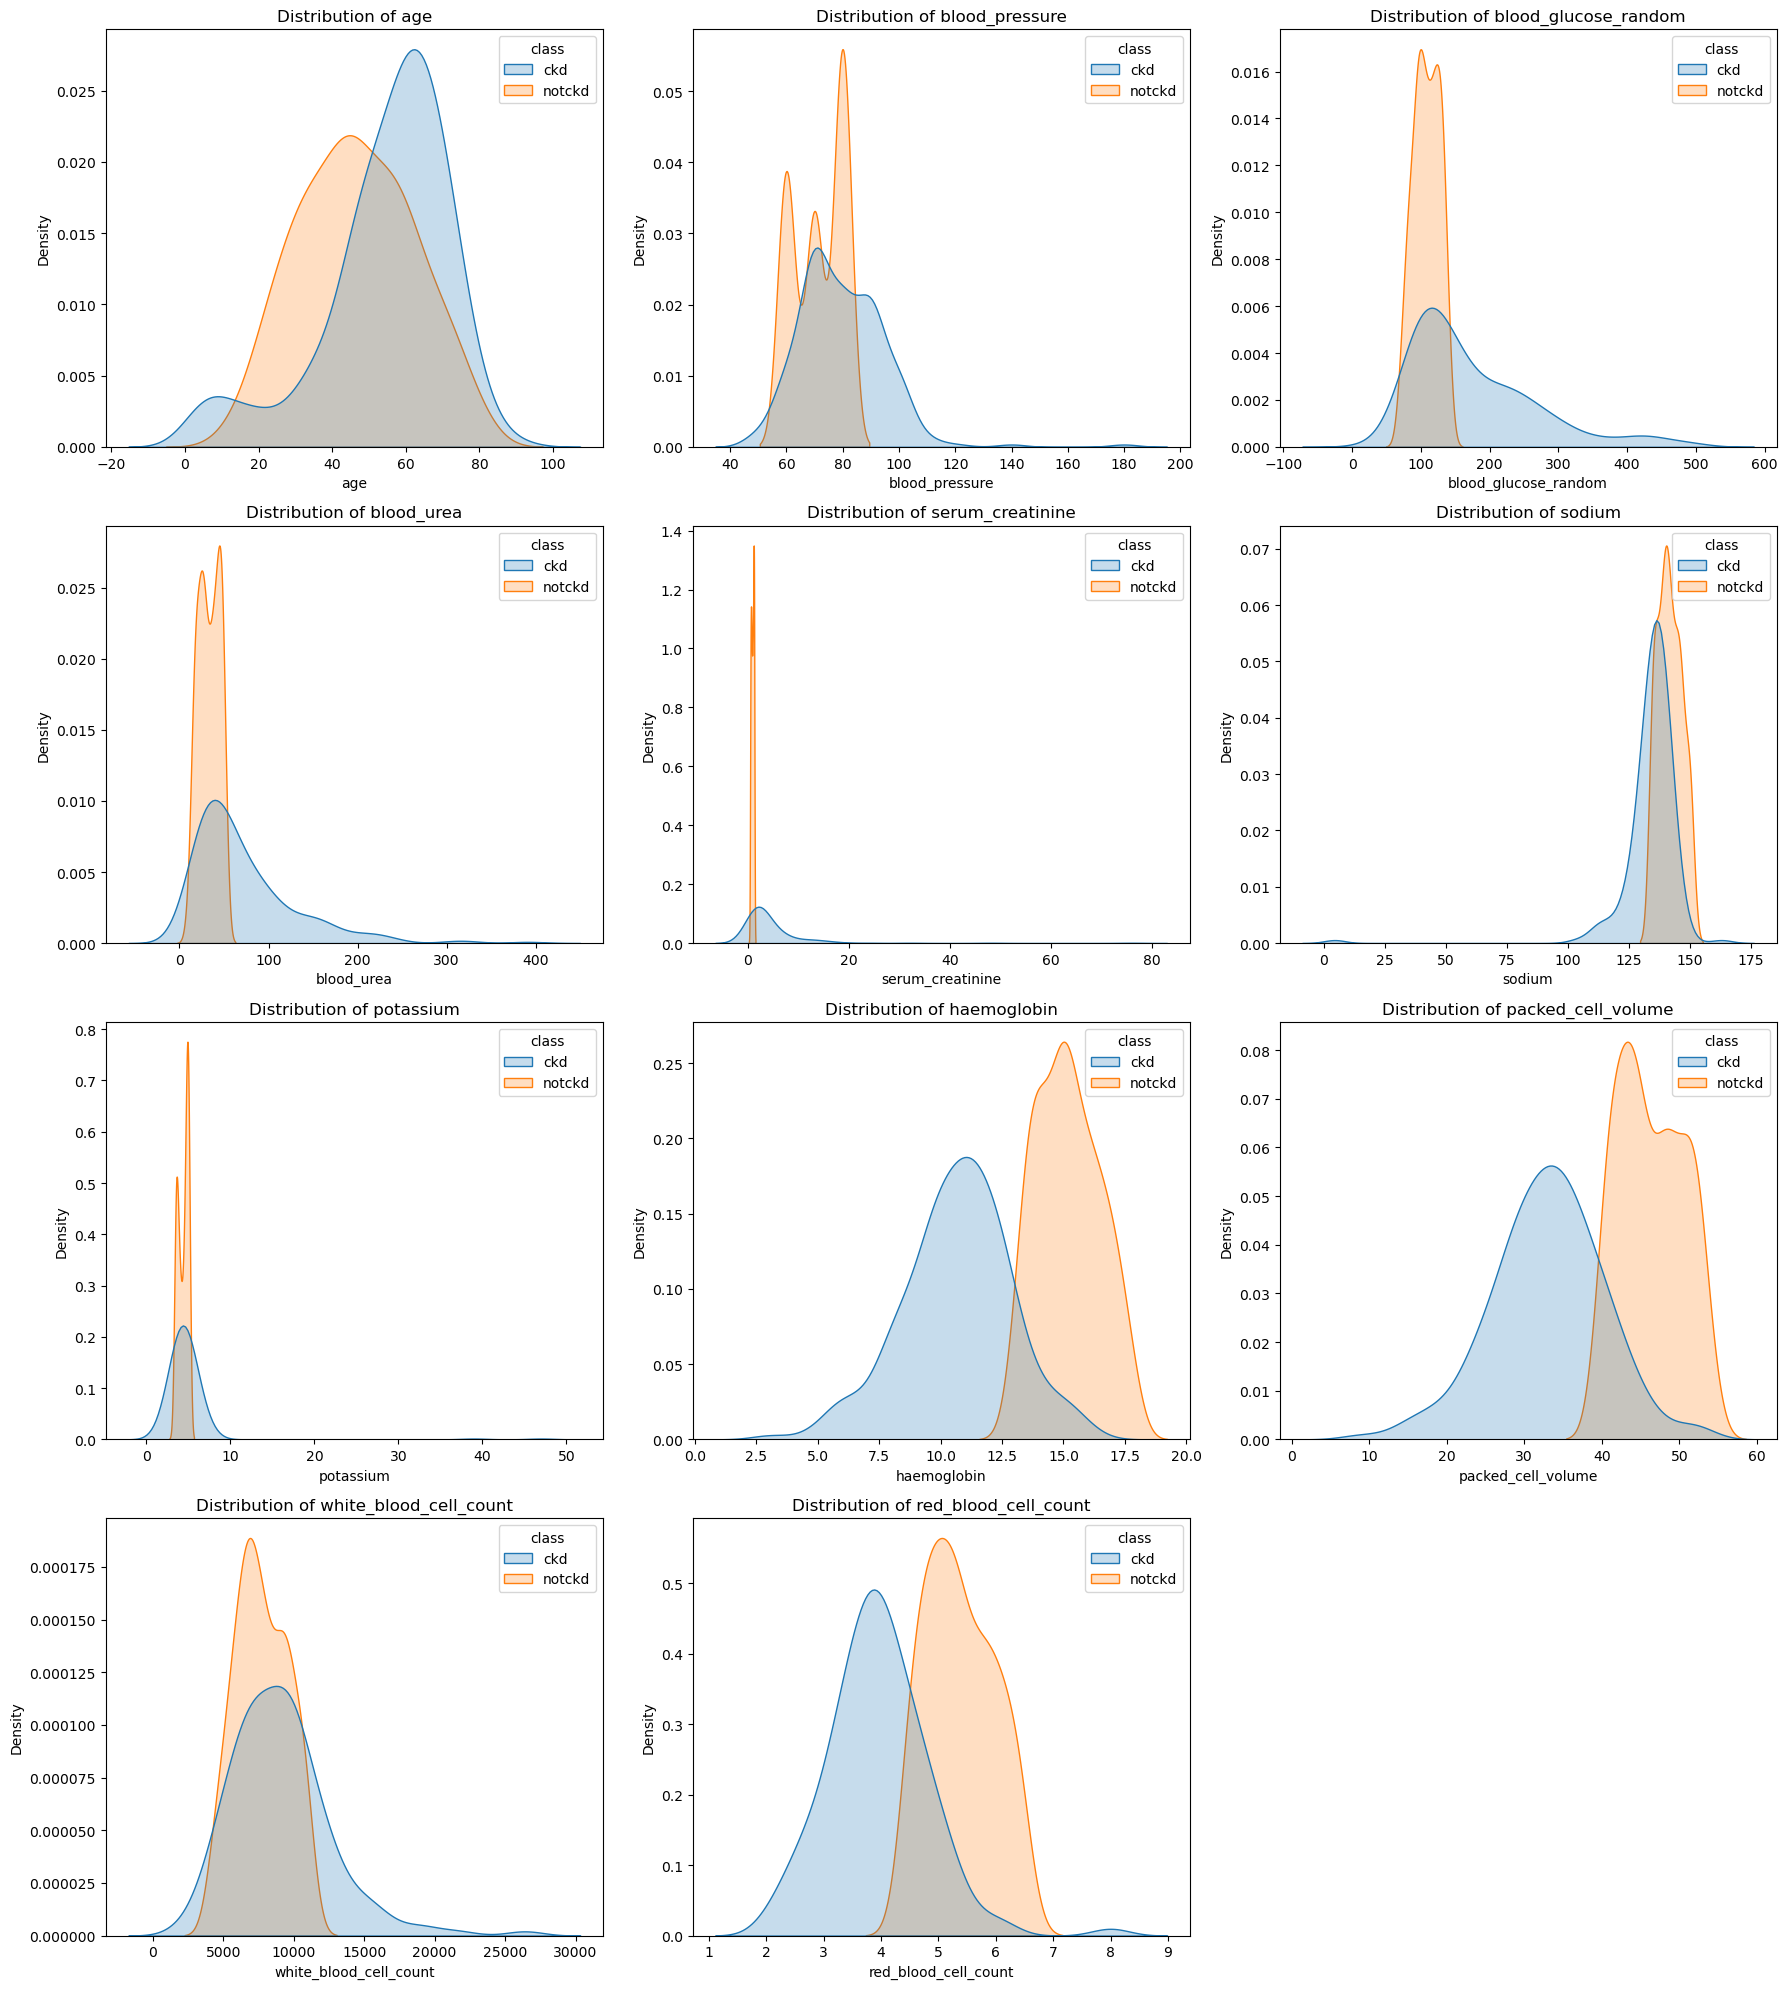

In [35]:
kde_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
            'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

n_cols = 3
n_rows = math.ceil(len(kde_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(kde_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(
        data=df,
        x=col,
        hue='class',
        fill=True,
        common_norm=False
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


**There are skewness present in the distribution of CKD class**

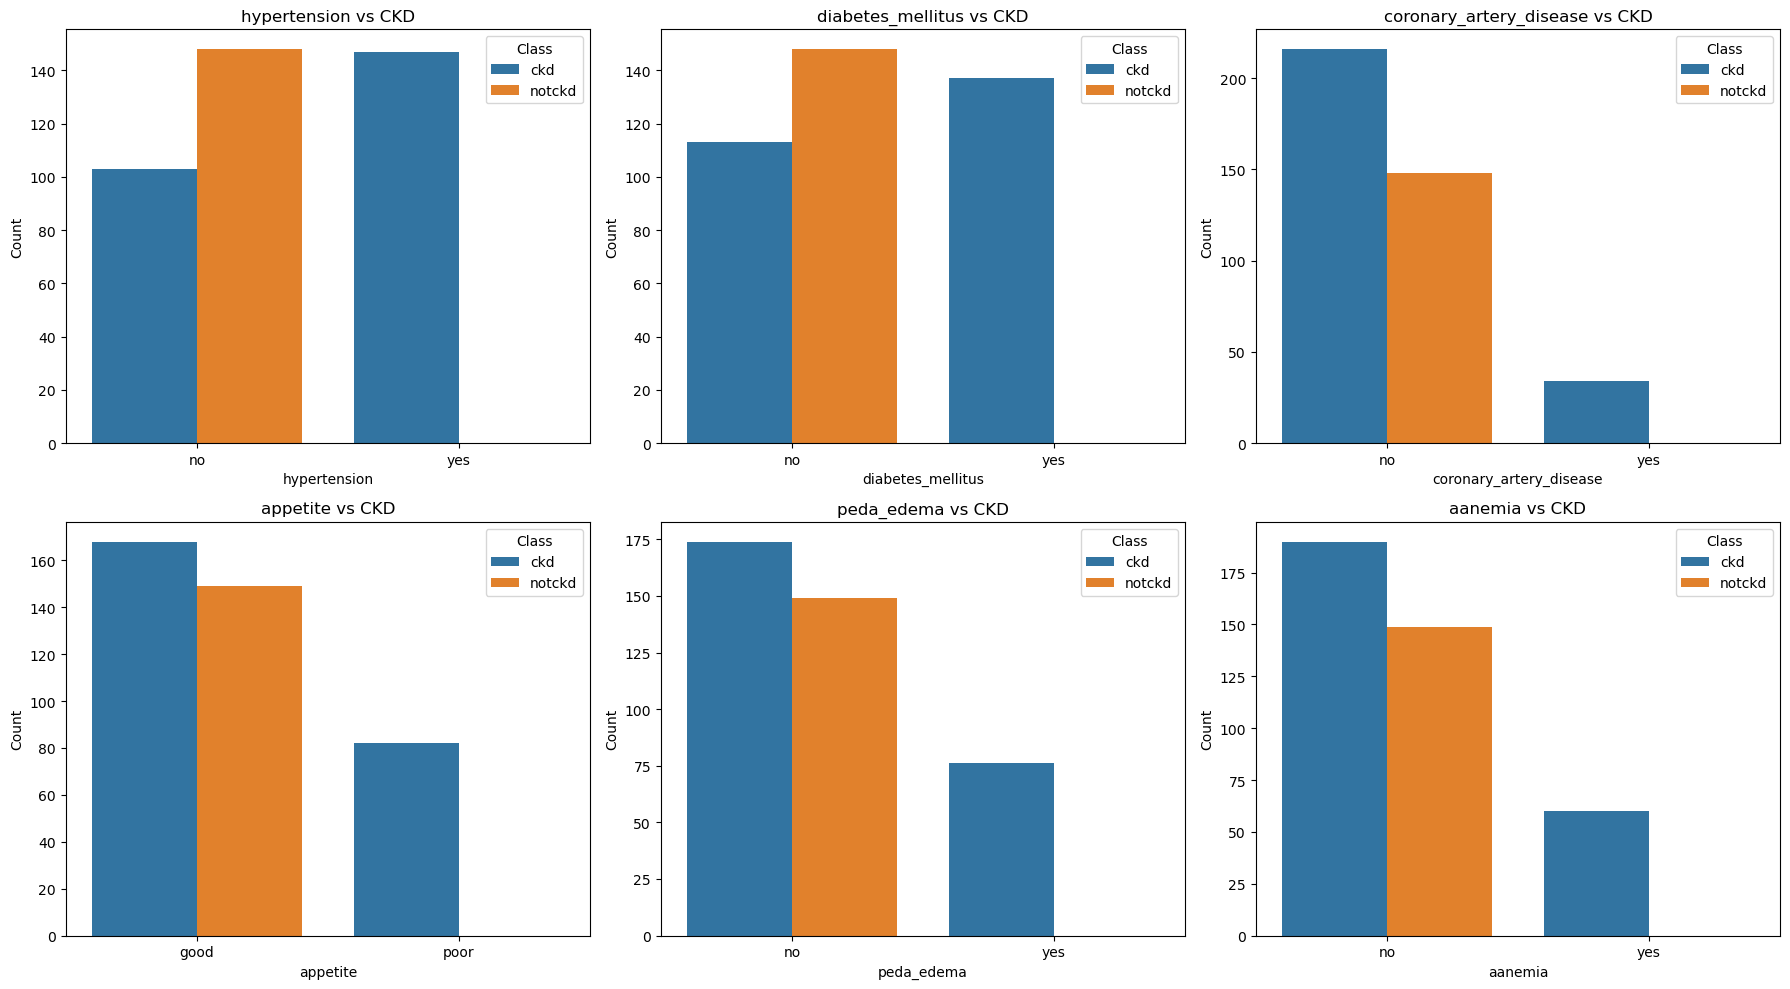

In [36]:
cat_cols = ['hypertension', 'diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia']

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'{col} vs CKD')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class')

plt.tight_layout()
plt.show()

### Multi-variate analysis

/Users/nebula/opt/anaconda3/envs/CKD_Env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



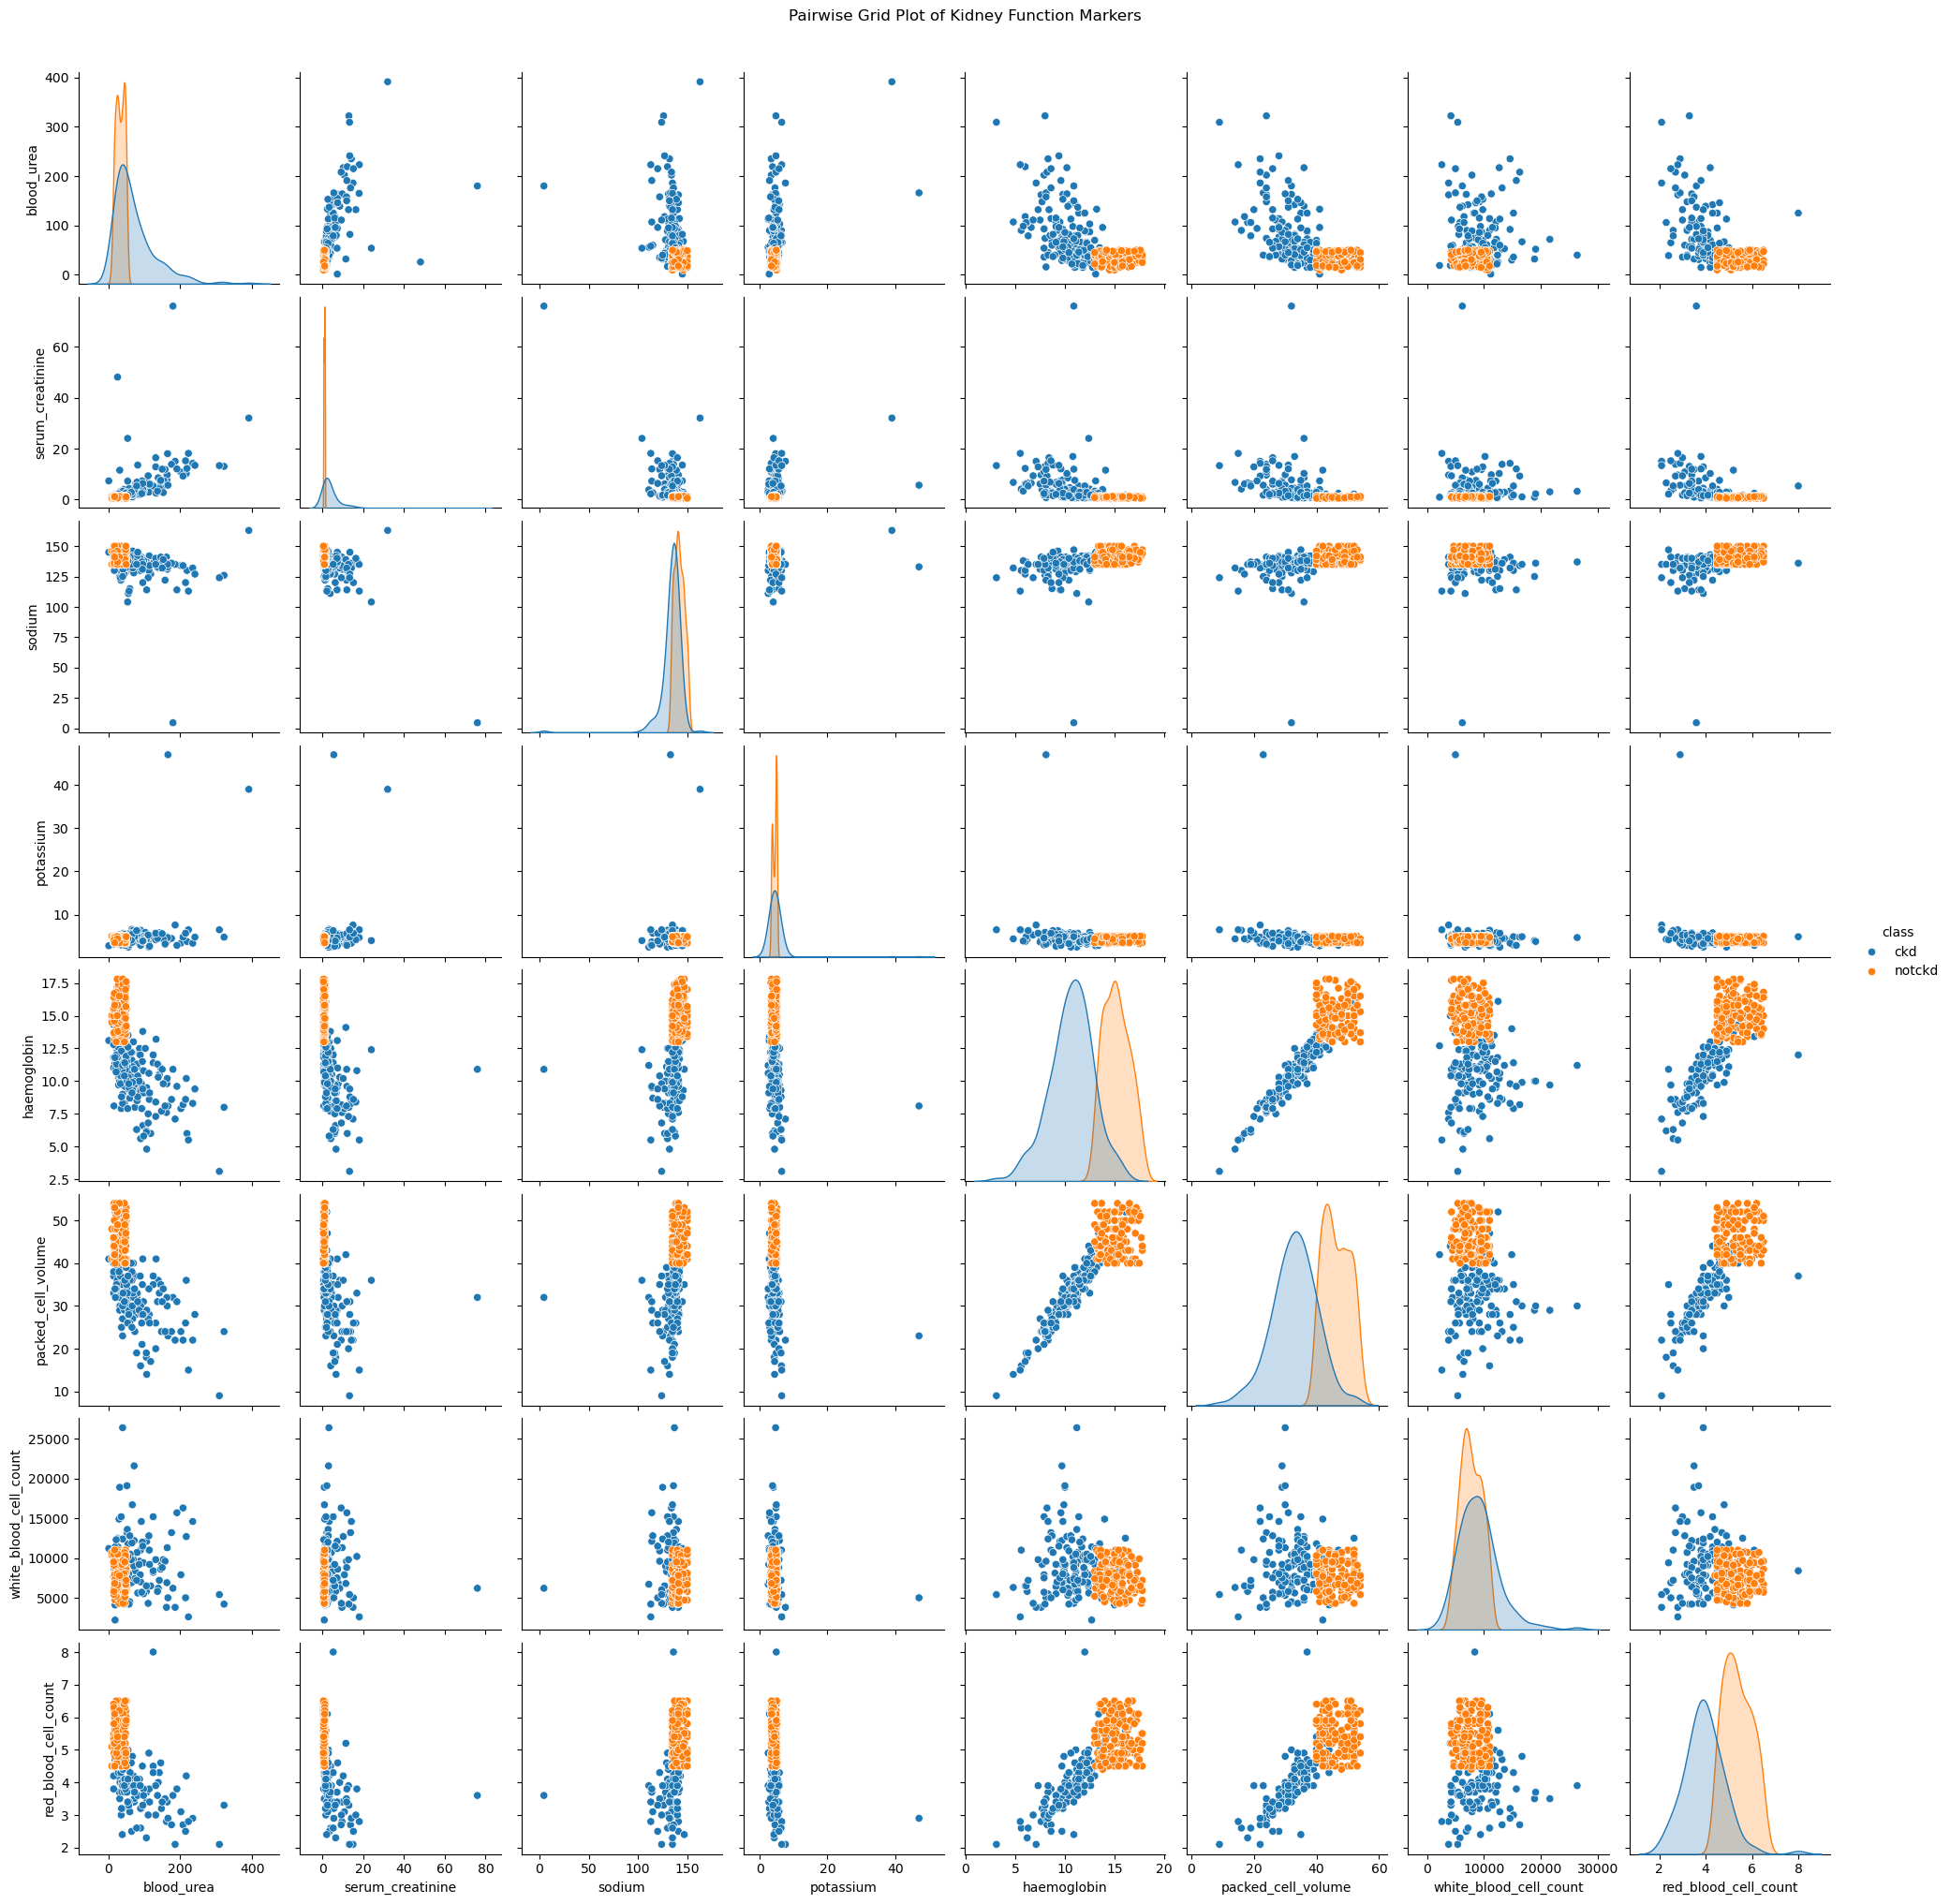

In [37]:
kidney_cols = ['specific_gravity','albumin','sugar','blood_urea', 'serum_creatinine', 'sodium', 'potassium', 
               'haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

sns.pairplot(
    df[kidney_cols + ['class']],
    hue='class',
    diag_kind='kde'
)

plt.suptitle('Pairwise Grid Plot of Kidney Function Markers', y=1.02)
plt.show()


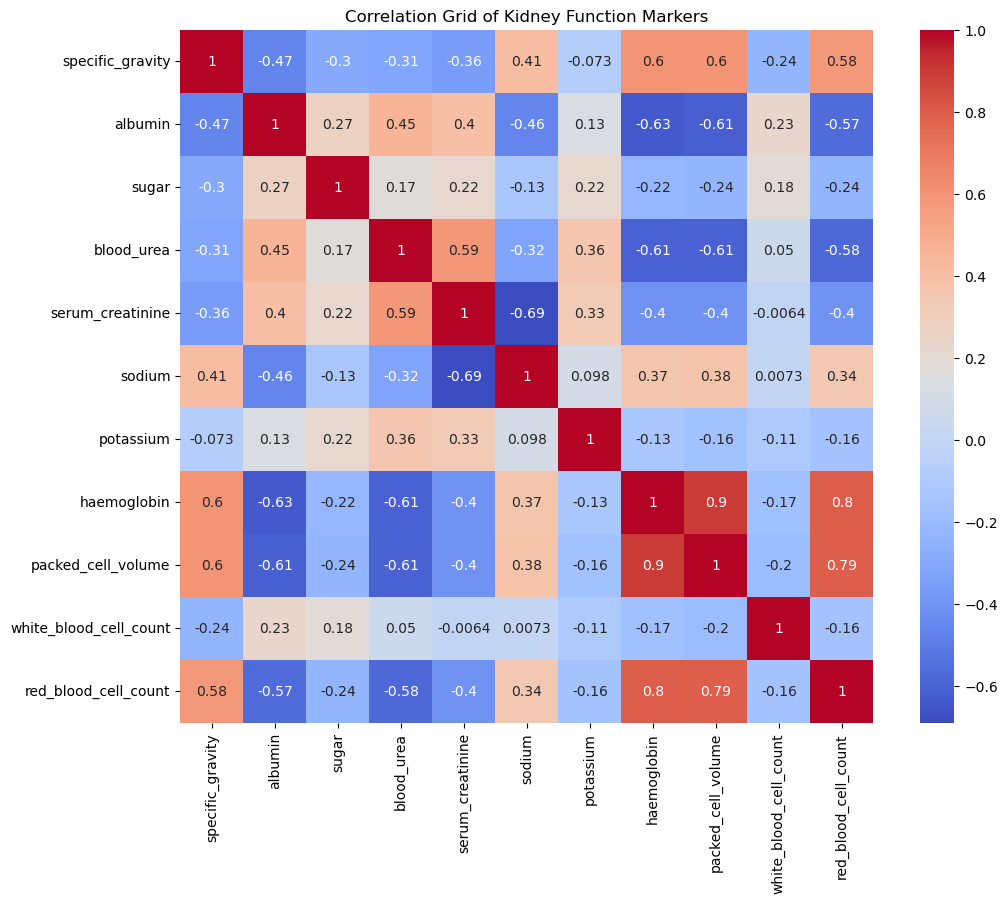

In [38]:
plt.figure(figsize=(12,9))
sns.heatmap(
    df[kidney_cols].corr(),
    annot=True,
    cmap='coolwarm',
    square=True
)
plt.title('Correlation Grid of Kidney Function Markers')
plt.show()


## Analyze missingness pattern across features and develop strategies to handle them.

**As we have seen there are many missing value in the data. Either we can drop them or impute values, in this case we are going to do imputations.**

In [39]:
# Calculate missing percentage
missing_pct = (df.isnull().sum() / df.shape[0]) * 100
missing_pct = missing_pct.sort_values(ascending=False)

# Plot
fig = px.bar(
    x=missing_pct.index,
    y=missing_pct.values,
    labels={'x': 'Features', 'y': 'Missing Value Percentage (%)'},
    title='Percentage of Missing Values per Feature'
)

fig.update_layout(
    width=1100,
    height=600,
    xaxis_tickangle=-45
)

fig.show()

* 20% < 'red_blood_cells','white_blood_cell_count','red_blood_cell_count', 'potassium', 'sodium'  < 40%
* 10% < 'packed_cell_volume','pus_cell', 'haemoglobin', 'sugar', 'specific_gravity','albumin','blood_glucose_random'< 20%
* 2%< 'eGFR','blood_urea','serum_creatinine','blood_pressure','age' < 10%
* 0.2%< 'bacteria','pus_cell_clumps','hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia']<=1

**Heatmap of missing Features**

In [40]:

# Binary missing matrix: 1 = missing, 0 = present
missing_matrix = df.isnull().astype(int)

fig = go.Figure(
    data=go.Heatmap(
        z=missing_matrix.T.values,   # transpose so features are on Y-axis
        x=list(range(df.shape[0])), # sample indices
        y=missing_matrix.columns,   # FEATURE NAMES on Y-axis
        colorscale='Blues',
        showscale=True,
        colorbar=dict(title="Missing")
    )
)

fig.update_layout(
    title="Missing Value Heatmap (Feature vs Sample)",
    xaxis_title="Samples",
    yaxis_title="Features",
    height=650,
    width=1200
)

fig.show()


### Understanding the pattern and mechanism behind missingness.

* **MCAR — Missing Completely At Random**

Missingness depends on other observed variables, but not on the missing value itself

In [41]:
missing_indicator = df.isnull().astype(int)

corr_with_missing = missing_indicator.corr()

corr_with_missing

age  blood_pressure  specific_gravity   albumin  \
age                      1.000000       -0.026681          0.101689  0.103832   
blood_pressure          -0.026681        1.000000          0.026852  0.028482   
specific_gravity         0.101689        0.026852          1.000000  0.939235   
albumin                  0.103832        0.028482          0.939235  1.000000   
sugar                    0.097562        0.023691          0.929242  0.964790   
red_blood_cells          0.054873        0.013285          0.434096  0.412014   
pus_cell                 0.115952        0.121164          0.765241  0.754631   
pus_cell_clumps         -0.015248        0.129616         -0.036673 -0.036229   
bacteria                -0.015248        0.129616         -0.036673 -0.036229   
blood_glucose_random     0.000539        0.125527         -0.029031 -0.026548   
blood_urea              -0.033880        0.098526         -0.081485 -0.043657   
serum_creatinine        -0.031964        0.108247         -0.076875 -0.075946   
sodium                   0.042599        0.049378         -0.004187 -0.019090   
potassium                0.041508        0.048114          0.012369 -0.002270   
haemoglobin              0.041604        0.019174          0.135971  0.116975   
packed_cell_volume       0.061877        0.033369          0.216547  0.222219   
white_blood_cell_count   0.099884        0.060436          0.273456  0.262971   
red_blood_cell_count     0.109646        0.064642          0.241651  0.232688   
hypertension            -0.010755       -0.012467         -0.025866 -0.025554   
diabetes_mellitus       -0.010755       -0.012467         -0.025866 -0.025554   
coronary_artery_disease -0.010755       -0.012467         -0.025866 -0.025554   
appetite                -0.007595       -0.008804         -0.018267 -0.018046   
peda_edema              -0.007595       -0.008804         -0.018267 -0.018046   
aanemia                 -0.007595       -0.008804         -0.018267 -0.018046   
class                         NaN             NaN               NaN       NaN   
eGFR                     0.575416        0.072526         -0.001732  0.000318   

                            sugar  red_blood_cells  pus_cell  pus_cell_clumps  \
age                      0.097562         0.054873  0.115952        -0.015248   
blood_pressure           0.023691         0.013285  0.121164         0.129616   
specific_gravity         0.929242         0.434096  0.765241        -0.036673   
albumin                  0.964790         0.412014  0.754631        -0.036229   
sugar                    1.000000         0.430125  0.765545        -0.037551   
red_blood_cells          0.430125         1.000000  0.436996        -0.026918   
pus_cell                 0.765545         0.436996  1.000000         0.023838   
pus_cell_clumps         -0.037551        -0.026918  0.023838         1.000000   
bacteria                -0.037551        -0.026918  0.023838         1.000000   
blood_glucose_random     0.014866         0.070454  0.018410        -0.035333   
blood_urea              -0.047589        -0.029542  0.029072        -0.022444   
serum_creatinine        -0.078717         0.013787 -0.025615        -0.021174   
sodium                   0.006330         0.261431  0.014168        -0.052987   
potassium                0.022457         0.268066  0.027811        -0.053376   
haemoglobin              0.127651         0.156827  0.131987         0.035862   
packed_cell_volume       0.245513         0.283347  0.203298        -0.046689   
white_blood_cell_count   0.293977         0.323504  0.226872        -0.060348   
red_blood_cell_count     0.259194         0.353611  0.183569        -0.070136   
hypertension            -0.026486        -0.055497 -0.031225        -0.007125   
diabetes_mellitus       -0.026486        -0.055497 -0.031225        -0.007125   
coronary_artery_disease -0.026486        -0.055497 -0.031225        -0.007125   
appetite                -0.018705        -0.039193 -0.022052

In [42]:
fig = px.imshow(
    corr_with_missing,
    width=1600, height=1500,
    text_auto=True,
    title="Missingness Correlation Heatmap"
)

fig.show()


**we have strong correlation as MAR pattern**
* albumin, specific_gravity, sugar, bacteria, pus_cell_clumps, serum_creatinine, blood_urea, potassium, sodium, diabetes_mellitus, hypertension, coronary_artery_disease, appetite, peda_edema, aanemia

These values are missing because of logical clinical or procedural reasons, not due to random data-entry mistakes.
This reflects real-world medical workflows, where diagnostic tests and clinical observations are recorded selectively based on patient condition, symptoms, and disease severity.

| Feature                     | Why Missing (Logical / Clinical Reason)                  |
| --------------------------- | -------------------------------------------------------- |
| **albumin**                 | Test performed only if urine abnormalities are suspected |
| **specific_gravity**        | Measured only during detailed urine examination          |
| **sugar**                   | Ordered primarily if diabetes is suspected               |
| **bacteria**                | Urine culture conducted only when infection is suspected |
| **pus_cell_clumps**         | Evaluated mainly when infection indicators are present   |
| **serum_creatinine**        | Measured when kidney dysfunction is suspected            |
| **blood_urea**              | Typically ordered after abnormal creatinine findings     |
| **potassium, sodium**       | Electrolyte tests conducted in moderate to severe cases  |
| **diabetes_mellitus**       | Recorded only if the patient reports or is diagnosed     |
| **hypertension**            | Diagnosed after repeated blood pressure monitoring       |
| **coronary_artery_disease** | Documented after cardiac evaluation                      |
| **appetite**                | Not consistently recorded for all patients               |
| **peda_edema**              | Noted only when visible swelling is present              |
| **aanemia**                 | Identified after blood investigations                    |


### Strategies to handle them
Since most important kidney markers are MAR, best strategies:

| Feature Group   | Best Imputation            |
| --------------- | -------------------------- |
| 20–40% MAR      | KNN                        |
| 10–20% MAR      | Iterative (MICE)           |
| <10% MAR        | Median                     |
| Categorical MAR | Mode                       |

**Group 1 — Very Low Missing (≤ 1%)**

* Strategy → Mode Imputation

Reason: negligible missing, categorical data mode is safest

In [43]:
df_original = df.copy()   # before imputation
df_imputed  = df.copy()   # after applying your full imputation pipeline

for col in ['bacteria','pus_cell_clumps','hypertension','diabetes_mellitus',
            'coronary_artery_disease','appetite','peda_edema','aanemia']:
    df_imputed[col].fillna(df_imputed[col].mode()[0], inplace=True)


**Group 2 — Low Missing (2% – 10%)**

* Strategy → Median Imputation

Reason: numeric, low missing, robust to outliers

In [44]:
for col in ['eGFR','blood_urea','serum_creatinine','blood_pressure','age']:
    df_imputed[col].fillna(df_imputed[col].median(), inplace=True)


**Group 3 — Medium Missing (10% – 20%)**
* Strategy → Iterative Imputer (MICE)

Reason:
MAR pattern, strong multivariate dependency, best statistical method.

In [45]:

mice_cols = [
    'packed_cell_volume','haemoglobin','sugar',
    'specific_gravity','albumin','blood_glucose_random'
]

mice = IterativeImputer(max_iter=10, random_state=42)
df_imputed[mice_cols] = mice.fit_transform(df_imputed[mice_cols])

df_imputed['pus_cell'].fillna(df_imputed['pus_cell'].mode()[0], inplace=True)

**Group 4 — Moderate–High Missing (20% – 40%)**
* Strategy → KNN Imputation

Reason: strong MAR + preserves patient similarity

In [46]:

knn_cols = [
    'white_blood_cell_count','red_blood_cell_count',
    'potassium','sodium'
]

knn = KNNImputer(n_neighbors=5)
df_imputed[knn_cols] = knn.fit_transform(df_imputed[knn_cols])

df_imputed['red_blood_cells'].fillna(df_imputed['red_blood_cells'].mode()[0], inplace=True)


### Compare Multiple imputation techniques 

In [47]:
def compare_stats(original, imputed, cols):
    return pd.DataFrame({
        'Original Mean': original[cols].mean(),
        'Imputed Mean': imputed[cols].mean(),
        'Original Median': original[cols].median(),
        'Imputed Median': imputed[cols].median(),
        'Original Std': original[cols].std(),
        'Imputed Std': imputed[cols].std()
    })


In [48]:
num_cols = ['age','blood_pressure','blood_urea','serum_creatinine',
            'sodium','potassium','haemoglobin']

compare_stats(df_original, df_imputed, num_cols)


Original Mean  Imputed Mean  Original Median  \
age                   51.483376     51.562500            55.00   
blood_pressure        76.469072     76.575000            80.00   
blood_urea            57.425722     56.693000            42.00   
serum_creatinine       3.072454      2.997125             1.30   
sodium               137.528754    137.490125           138.00   
potassium              4.627244      4.635374             4.40   
haemoglobin           12.526437     12.524225            12.65   

                  Imputed Median  Original Std  Imputed Std  
age                    55.000000     17.169714    16.982996  
blood_pressure         80.000000     13.683637    13.489785  
blood_urea             42.000000     50.503006    49.395258  
serum_creatinine        1.300000      5.741126     5.628886  
sodium                137.528754     10.408752     9.346950  
potassium               4.500000      3.193904     2.888466  
haemoglobin            12.811423      2.912587     2.785593

In [49]:

def compare_distribution(col):
    df_plot = pd.DataFrame({
        'Original': df_original[col],
        'Imputed': df_imputed[col]
    }).melt(var_name='Type', value_name=col)

    fig = px.histogram(
        df_plot, x=col, color='Type',
        barmode='overlay',
        nbins=40,
        title=f'Distribution Comparison: {col}'
    )

    fig.show()


In [50]:
compare_distribution('serum_creatinine')

In [51]:
compare_distribution('blood_urea')

In [52]:
compare_distribution('potassium')

In [53]:
corr_orig = df_original[num_cols].corr()
corr_imp  = df_imputed[num_cols].corr()

fig1 = px.imshow(corr_orig, title="Original Data Correlation Heatmap")
fig2 = px.imshow(corr_imp,  title="Imputed Data Correlation Heatmap")

fig1.show()
fig2.show()

* **As we can see from the plots** 

**Comparative evaluation between original and imputed datasets demonstrates that the proposed hybrid imputation strategy preserves the statistical distribution and correlation structure of clinical features, while significantly improving predictive performance by mitigating information loss caused by missing values**

### Detect and handle outliers appropriately(clinical validation vs data errors)

As we have seen in the EDA, there are outliers present in CKD patients it might be because CKD is a pathological condition.

| Parameter        | Why Outliers Exist in CKD                |
| ---------------- | ---------------------------------------- |
| blood_urea       | Waste accumulation → very high values    |
| serum_creatinine | Impaired filtration → extreme elevation  |
| potassium        | Electrolyte imbalance → dangerous spikes |
| sodium           | Fluid imbalance → extreme values         |
| haemoglobin      | Anemia → abnormally low                  |
| WBC count        | Infection → very high                    |
| eGFR             | Kidney failure → very low                |

Outliers observed predominantly in the CKD class represent true pathological extremes associated with kidney dysfunction, rather than data anomalies. These extreme values carry high diagnostic importance.

decide which outliers are REAL vs ERRORS?

* Clinically Valid Outliers

| Feature          | Valid Extreme Range in CKD |
| ---------------- | -------------------------- |
| serum_creatinine | > 8 mg/dL                  |
| blood_urea       | > 200 mg/dL                |
| potassium        | > 6 mmol/L                 |
| sodium           | < 120 mmol/L               |
| haemoglobin      | < 6 g/dL                   |
| eGFR             | < 10 ml/min                |
| WBC              | > 30,000                   |
| RBC              | < 2 million                |

* Likely Data Errors

| Feature        | Impossible Values |
| -------------- | ----------------- |
| age            | < 0 or > 120      |
| blood_pressure | < 40 or > 250     |
| sodium         | < 100 or > 180    |
| potassium      | < 1 or > 10       |
| eGFR           | > 150             |


so we will treat the outliers using the method.

| Parameter              | Best Outlier Method      |
| ---------------------- | ------------------------ |
| age                    | IQR + clinical rules     |
| blood_pressure         | IQR + medical thresholds |
| blood_glucose_random   | **Modified Z-score**     |
| blood_urea             | **Modified Z-score**     |
| serum_creatinine       | **Modified Z-score**     |
| sodium                 | **Modified Z-score**     |
| potassium              | **Modified Z-score**     |
| white_blood_cell_count | **Modified Z-score**     |
| red_blood_cell_count   | **Modified Z-score**     |
| eGFR                   | **Modified Z-score**     |
| haemoglobin            | IQR                      |
| packed_cell_volume     | IQR                      |


In [54]:
def treat_outliers_modified_z(df, col, threshold=3.5, method='cap'):
    """
    Treat outliers using Modified Z-score.
    method:
        'cap'  -> Winsorization (recommended for clinical data)
        'remove' -> Row removal (NOT recommended for CKD)
    """
    
    median = df[col].median()
    mad = np.median(np.abs(df[col] - median))
    
    if mad == 0:
        return df

    modified_z = 0.6745 * (df[col] - median) / mad
    outlier_idx = np.abs(modified_z) > threshold

    if method == 'cap':
        lower_cap = df.loc[~outlier_idx, col].min()
        upper_cap = df.loc[~outlier_idx, col].max()

        df.loc[modified_z > threshold, col] = upper_cap
        df.loc[modified_z < -threshold, col] = lower_cap

    elif method == 'remove':
        df = df.loc[~outlier_idx]

    return df

In [55]:
mod_z_cols = [
    'blood_glucose_random','blood_urea','serum_creatinine',
    'sodium','potassium','white_blood_cell_count',
    'red_blood_cell_count','eGFR'
]

for col in mod_z_cols:
    df_imputed = treat_outliers_modified_z(df_imputed, col, threshold=3.5, method='cap')

In [56]:
num_cols = [
    'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
    'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
    'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count','eGFR'
]

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=[f'{col} vs CKD' for col in num_cols]
)

count = 0
for i, col in enumerate(num_cols):
    row = (i // n_cols) + 1
    col_pos = (i % n_cols) + 1

    fig.add_trace(
        go.Box(
            x=df_imputed['class'],
            y=df_imputed[col],
            boxmean=True,
            name=col
        ),
        row=row, col=col_pos
    )

fig.update_layout(
    height=350 * n_rows,
    width=1200,
    showlegend=False,
    title_text="Bivariate Analysis: Numerical Features vs CKD Class"
)

fig.show()

**Outliers were treated using a clinically guided winsorization strategy based on modified Z-score detection. This approach preserved pathological extreme values while preventing model instability caused by abnormal measurement noise.**

### Perform statistical tests (t-test, Mann-Whitney U) to identify significantly different parameters

Independent t-test (parametric)

Mann–Whitney U test (non-parametric)

to identify significantly different clinical parameters between CKD vs non-CKD.

most clinical parameters are skewed, Mann–Whitney U is more reliable.
But perform both for statistical rigor.

In [57]:
ckd = df_imputed[df_imputed['class'] == 'ckd']
non_ckd = df_imputed[df_imputed['class'] == 'notckd']

In [58]:
# taken numerical features
features = [
    'age','blood_pressure','blood_glucose_random','blood_urea',
    'serum_creatinine','sodium','potassium','haemoglobin',
    'packed_cell_volume','white_blood_cell_count',
    'red_blood_cell_count','eGFR'
]

results = []

for col in features:
    x1 = ckd[col].dropna()
    x2 = non_ckd[col].dropna()

    # t-test (Welch)
    t_stat, t_p = ttest_ind(x1, x2, equal_var=False)

    # Mann–Whitney U test
    u_stat, u_p = mannwhitneyu(x1, x2, alternative='two-sided')

    results.append([col, t_stat, t_p, u_stat, u_p])

stats_df = pd.DataFrame(
    results,
    columns=['Feature', 'T-statistic', 'T-pvalue', 'U-statistic', 'U-pvalue']
)

stats_df.sort_values(by='U-pvalue')


Feature  T-statistic      T-pvalue  U-statistic  \
7              haemoglobin   -24.125686  7.362240e-80       1420.5   
8       packed_cell_volume   -22.541399  4.357330e-73       1811.5   
4         serum_creatinine    19.171862  6.046099e-53      34556.5   
11                    eGFR   -15.473711  1.582181e-39       3075.5   
10    red_blood_cell_count   -15.413004  6.653340e-42       5377.5   
5                   sodium   -11.971392  1.208335e-27       7695.5   
2     blood_glucose_random    13.039864  1.668934e-31      28869.0   
3               blood_urea    11.855868  3.012790e-27      27910.5   
1           blood_pressure     6.963339  1.383476e-11      25027.5   
0                      age     4.777547  2.653362e-06      24941.0   
9   white_blood_cell_count     4.499688  9.058848e-06      23190.0   
6                potassium     1.932451  5.405341e-02      19410.0   

        U-pvalue  
7   4.634967e-54  
8   9.093735e-52  
4   1.546771e-45  
11  1.479056e-44  
10  6.156661e-33  
5   4.534572e-23  
2   1.484478e-19  
3   2.643359e-16  
1   6.939528e-09  
0   3.169967e-08  
9   7.241673e-05  
6   5.552216e-01

Except for potassium others are statistically important.

Independent t-test and Mann–Whitney U test results reveal that haemoglobin, packed cell volume, serum creatinine, eGFR, red blood cell count, sodium, blood glucose, and blood urea demonstrate extremely significant differences (p < 0.001) between CKD and non-CKD patients. These findings confirm their strong discriminative power and clinical relevance for chronic kidney disease prediction. Potassium, although clinically important, did not exhibit statistically significant group separation in this dataset

### Visualize normal ranges vs. observed values for key biomakers.

Only serum creatinine, blood urea, eGFR, haemoglobin, sodium, and potassium were selected because they are clinically established kidney function markers and exhibited the highest statistical significance and discriminative power between CKD and non-CKD groups in our analysis.

* Normal range observed

| Biomarker        | Normal Range     |
| ---------------- | ---------------- |
| serum_creatinine | 0.6 – 1.3 mg/dL  |
| blood_urea       | 15 – 40 mg/dL    |
| eGFR             | 90 – 120 ml/min  |
| haemoglobin      | 12 – 16 g/dL     |
| sodium           | 135 – 145 mmol/L |
| potassium        | 3.5 – 5.0 mmol/L |



In [59]:
normal_ranges = {
    'serum_creatinine': (0.6, 1.3),
    'blood_urea': (15, 40),
    'eGFR': (90, 120),
    'haemoglobin': (12, 16),
    'sodium': (135, 145),
    'potassium': (3.5, 5.0)
}

def plot_biomarker_range(df, feature):
    low, high = normal_ranges[feature]

    fig = go.Figure()

    # Non-CKD points
    fig.add_trace(go.Scatter(
        y=df[df['class']=='notckd'][feature],
        x=['Non-CKD'] * len(df[df['class']=='notckd']),
        mode='markers',
        name='Non-CKD',
        marker=dict(size=6)
    ))

    # CKD points
    fig.add_trace(go.Scatter(
        y=df[df['class']=='ckd'][feature],
        x=['CKD'] * len(df[df['class']=='ckd']),
        mode='markers',
        name='CKD',
        marker=dict(size=6)
    ))

    # Normal range band
    fig.add_shape(
        type="rect",
        x0=-0.5, x1=1.5,
        y0=low, y1=high,
        fillcolor="green",
        opacity=0.15,
        layer="below",
        line_width=0
    )

    fig.update_layout(
        title=f"{feature} — Observed Values vs Normal Clinical Range",
        yaxis_title=feature,
        xaxis_title="Class",
        showlegend=True,
        height=550,
        width=700
    )

    fig.show()

In [60]:
key_biomarkers = [
    'serum_creatinine', 'blood_urea', 'eGFR',
    'haemoglobin', 'sodium', 'potassium'
]

for biomarker in key_biomarkers:
    plot_biomarker_range(df_imputed, biomarker)


Visual comparison of observed biomarker distributions against standard clinical reference ranges clearly demonstrates that CKD patients exhibit pronounced deviations in renal and hematological markers, validating their pathological significance.

### Investigate the relationship between comorbidities (diabeties, hypertension) and CKD

* We will analyze Prevalence analysis

In [61]:
comorbidities = ['diabetes_mellitus', 'hypertension']
target = 'class'

pd.crosstab(df_imputed['class'], df_imputed['diabetes_mellitus'], normalize='index') * 100


diabetes_mellitus     no   yes
class                         
ckd                 45.2  54.8
notckd             100.0   0.0

shows that diabetes_mellitus, 45.2% of patients not having CKD while 54.8% have CKD

In [62]:
pd.crosstab(df_imputed['class'], df_imputed['hypertension'], normalize='index') * 100

hypertension     no   yes
class                    
ckd            41.2  58.8
notckd        100.0   0.0

shows that hypertension, 41.2% of patients not having CKD while 58.8% have CKD

**Risk Estimation Using Odds Ratio**

In [63]:
from scipy.stats import chi2_contingency

def chi_square_test(feature):
    table = pd.crosstab(df_imputed[feature], df_imputed['class'])
    chi2, p, dof, expected = chi2_contingency(table)
    return chi2, p

for col in ['diabetes_mellitus', 'hypertension']:
    chi2, p = chi_square_test(col)
    print(f"{col}: chi2 = {chi2:.3f}, p-value = {p:.5f}")


diabetes_mellitus: chi2 = 122.597, p-value = 0.00000
hypertension: chi2 = 136.928, p-value = 0.00000


p< 0.05 Very strong association

**Risk Estimation Using Odds Ratio**

In [64]:
def odds_ratio(feature):
    table = pd.crosstab(df_imputed[feature], df_imputed['class'])
    a = table.loc['yes','ckd'] + 0.5
    b = table.loc['yes','notckd'] + 0.5
    c = table.loc['no','ckd'] + 0.5
    d = table.loc['no','notckd'] + 0.5

    OR = (a*d) / (b*c)
    return OR

print("Odds Ratio (Diabetes):", odds_ratio('diabetes_mellitus'))
print("Odds Ratio (Hypertension):", odds_ratio('hypertension'))

Odds Ratio (Diabetes): 364.647577092511
Odds Ratio (Hypertension): 428.96135265700485


**This means Extremely strong risk, but finite**

Statistical analysis reveals a strong association between diabetes mellitus and hypertension with chronic kidney disease.

## Feature Engineering

Create Clinically relevenat derived features:
* Estimated GFR: Gold standard kidney function indicator, since we have already computed this. skip this step.
* BUN/ Creatinine Ratio : Distinguishes types of kidney dysfunction given:

        BUN/Creatinine Ratio=Blood Urea Nitrogen (BUN)/Serum Creatinine

In [66]:
df_imputed['bun_creatinine_ratio'] = df_imputed['blood_urea'] / df_imputed['serum_creatinine']

In [69]:
df_imputed['bun_creatinine_ratio'] = df_imputed['bun_creatinine_ratio'].clip(lower=2, upper=60)


In [70]:
fig = px.box(
    df_imputed, x='class', y='bun_creatinine_ratio', color='class',
    title='BUN / Creatinine Ratio vs CKD'
)
fig.show()

As we can see low BUN / Creatinine Ratio for CKD class.

* Haemogloblin-Creatinine Ratio : Assesses anemia severity

CKD patients typically show: Low haemoglobin (anemia), High creatinine (poor kidney filtration)

        HCR=HCR=Serum CreatinineHaemoglobin​/Serum Creatinine

In [71]:
df_imputed['hemo_creatinine_ratio'] = np.where(
    df_imputed['serum_creatinine'] != 0,
    df_imputed['haemoglobin'] / df_imputed['serum_creatinine'],
    np.nan
)

In [73]:
df_imputed['hemo_creatinine_ratio'] = df_imputed['hemo_creatinine_ratio'].clip(lower=0.5, upper=30)

In [74]:
fig = px.box(
    df_imputed, x='class', y='hemo_creatinine_ratio', color='class',
    title='Haemoglobin / Creatinine Ratio vs CKD'
)
fig.show()

Interpretation of HCR
| Ratio Range | Meaning |
| ----------- | ------- |
|12 | Normal kidney + normal hemoglobin |
|6 – 12 | Mild renal impairment |
|3 – 6 | Moderate CKD + anemia |
|< 3 | Severe CKD + severe anemia |

* Custom Severity scores based on multiple abnormal parameters

To quantify disease severity by combining multiple abnormal clinical biomarkers into a single interpretable score.

| Condition           | Score |
| ------------------- | ----- |
| Within normal range | 0     |
| Mild abnormal       | 1     |
| Moderate abnormal   | 2     |
| Severe abnormal     | 3     |


In [77]:
severity_features = [
    'serum_creatinine', 
    'blood_urea', 
    'eGFR',
    'haemoglobin', 
    'sodium', 
    'potassium'
]

clinical_ranges = {
    'serum_creatinine': (0.6, 1.3),
    'blood_urea': (15, 40),
    'eGFR': (90, 120),
    'haemoglobin': (12, 16),
    'sodium': (135, 145),
    'potassium': (3.5, 5.0)
}

def severity_score(row):
    score = 0
    
    # Serum Creatinine
    if row['serum_creatinine'] > 3: score += 3
    elif row['serum_creatinine'] > 1.5: score += 2
    elif row['serum_creatinine'] > 1.3: score += 1

    # Blood Urea
    if row['blood_urea'] > 150: score += 3
    elif row['blood_urea'] > 80: score += 2
    elif row['blood_urea'] > 40: score += 1

    # eGFR (lower is worse)
    if row['eGFR'] < 15: score += 3
    elif row['eGFR'] < 30: score += 2
    elif row['eGFR'] < 60: score += 1

    # Haemoglobin
    if row['haemoglobin'] < 6: score += 3
    elif row['haemoglobin'] < 9: score += 2
    elif row['haemoglobin'] < 12: score += 1

    # Sodium
    if row['sodium'] < 120 or row['sodium'] > 155: score += 3
    elif row['sodium'] < 130 or row['sodium'] > 150: score += 2
    elif row['sodium'] < 135 or row['sodium'] > 145: score += 1

    # Potassium
    if row['potassium'] < 2.5 or row['potassium'] > 6.5: score += 3
    elif row['potassium'] < 3 or row['potassium'] > 6: score += 2
    elif row['potassium'] < 3.5 or row['potassium'] > 5: score += 1

    return score


In [78]:
df_imputed['ckd_severity_score'] = df_imputed.apply(severity_score, axis=1)

In [79]:
def severity_stage(score):
    if score <= 2: return 'Normal'
    elif score <= 6: return 'Mild'
    elif score <= 11: return 'Moderate'
    elif score <= 18: return 'Severe'
    else: return 'Critical'

df_imputed['ckd_severity_stage'] = df_imputed['ckd_severity_score'].apply(severity_stage)



In [80]:
fig = px.box(
    df_imputed, x='class', y='ckd_severity_score',
    title='CKD Severity Score Distribution',
    color='class'
)
fig.show()

In [84]:
df_imputed['ckd_severity_stage'].value_counts()

ckd_severity_stage
Normal      208
Mild         90
Moderate     88
Severe       14
Name: count, dtype: int64

#### Engineer interaction features (e.g. Diabetes x Blood Glocuse, Age x Creatinine)

Interaction features capture combined effects of two variables that cannot be learned well using individual features alone

| Interaction                       | Clinical Meaning                    |
| --------------------------------- | ----------------------------------- |
| **Diabetes × Blood Glucose**      | Hyperglycemia severity in diabetics |
| **Age × Creatinine**              | Age-related kidney decline          |
| **Hypertension × Blood Pressure** | BP load under hypertension          |
| **Urea × Creatinine**             | Combined renal dysfunction          |
| **eGFR × Creatinine**             | Filtration impairment               |
| **Haemoglobin × Creatinine**      | Anemia severity in renal failure    |
| **Sodium × Potassium**            | Electrolyte imbalance               |
| **Age × eGFR**                    | Aging + renal function decline      |


In [86]:
num_cols = [
    'age','blood_glucose_random','blood_urea','serum_creatinine',
    'blood_pressure','sodium','potassium','haemoglobin','eGFR'
]

for col in num_cols:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')

df_imputed['diabetes_bin'] = df_imputed['diabetes_mellitus'].map({'yes':1,'no':0}).astype(int)
df_imputed['hypertension_bin'] = df_imputed['hypertension'].map({'yes':1,'no':0}).astype(int)

# Interaction features
df_imputed['diabetes_x_glucose'] = df_imputed['diabetes_bin'] * df_imputed['blood_glucose_random']
df_imputed['age_x_creatinine'] = df_imputed['age'] * df_imputed['serum_creatinine']
df_imputed['hypertension_x_bp'] = df_imputed['hypertension_bin'] * df_imputed['blood_pressure']
df_imputed['urea_x_creatinine'] = df_imputed['blood_urea'] * df_imputed['serum_creatinine']
df_imputed['egfr_x_creatinine'] = df_imputed['eGFR'] * df_imputed['serum_creatinine']
df_imputed['hemo_x_creatinine'] = df_imputed['haemoglobin'] * df_imputed['serum_creatinine']
df_imputed['sodium_x_potassium'] = df_imputed['sodium'] * df_imputed['potassium']
df_imputed['age_x_egfr'] = df_imputed['age'] * df_imputed['eGFR']


In [87]:
fig = px.box(
    df_imputed, x='class', y='age_x_creatinine',
    title='Age × Creatinine Interaction vs CKD',
    color='class'
)
fig.show()

In [89]:
px.box(df_imputed, x='class', y='diabetes_x_glucose', color='class').show()

In [90]:
px.box(df_imputed, x='class', y='urea_x_creatinine', color='class').show()

These features imporves the feature importance

| Benefit                      | Why Important              |
| ---------------------------- | -------------------------- |
| Captures non-linear patterns | Better decision boundaries |
| Enhances discrimination      | Improves accuracy          |
| Adds clinical context        | Interpretability           |
| Boosts ML models             | Especially trees, boosting |

Clinically guided interaction features were engineered to capture compound physiological effects, significantly improving disease discrimination and predictive performance

#### Create categorical encodings and binary indicators for abnormal test results.

Convert raw clinical measurements into interpretable binary indicators such as:
Is this value normal or abnormal?

In [91]:
clinical_thresholds = {
    'blood_pressure': (90, 120),
    'blood_glucose_random': (70, 140),
    'blood_urea': (15, 40),
    'serum_creatinine': (0.6, 1.3),
    'sodium': (135, 145),
    'potassium': (3.5, 5.0),
    'haemoglobin': (12, 16),
    'packed_cell_volume': (36, 48),
    'white_blood_cell_count': (4000, 11000),
    'red_blood_cell_count': (4.5, 6.0),
    'eGFR': (90, 120)
}

# Create Binary Abnormal Flags
def create_abnormal_flags(df, thresholds):
    for col, (low, high) in thresholds.items():
        df[f'{col}_abnormal'] = ((df[col] < low) | (df[col] > high)).astype(int)
    return df

df_imputed = create_abnormal_flags(df_imputed, clinical_thresholds)


**Severity Encoding (Multi-Level Categories)**

In [92]:
#eGFR Staging (KDIGO Guidelines)
def egfr_stage(e):
    if e >= 90: return 0   # Normal
    elif e >= 60: return 1 # Mild
    elif e >= 30: return 2 # Moderate
    elif e >= 15: return 3 # Severe
    else: return 4         # Kidney Failure

df_imputed['egfr_stage'] = df_imputed['eGFR'].apply(egfr_stage)


In [93]:
# Creatinine Severity Levels
def creatinine_severity(c):
    if c <= 1.3: return 0
    elif c <= 2: return 1
    elif c <= 4: return 2
    else: return 3

df_imputed['creatinine_severity'] = df_imputed['serum_creatinine'].apply(creatinine_severity)


In [94]:
# Blood Urea Severity Levels
def urea_severity(u):
    if u <= 40: return 0
    elif u <= 80: return 1
    elif u <= 150: return 2
    else: return 3

df_imputed['urea_severity'] = df_imputed['blood_urea'].apply(urea_severity)


In [95]:
# Encode Clinical Conditions
df_imputed['diabetes_flag'] = df_imputed['diabetes_mellitus'].map({'yes':1,'no':0})
df_imputed['hypertension_flag'] = df_imputed['hypertension'].map({'yes':1,'no':0})
df_imputed['cad_flag'] = df_imputed['coronary_artery_disease'].map({'yes':1,'no':0})
df_imputed['anemia_flag'] = (df_imputed['haemoglobin'] < 12).astype(int)


In [96]:
# Validate abnormality Encodings
abnormal_cols = [c for c in df_imputed.columns if c.endswith('_abnormal')]

df_imputed[abnormal_cols].mean().sort_values(ascending=False) * 100


eGFR_abnormal                      90.25
blood_pressure_abnormal            79.50
blood_urea_abnormal                54.50
serum_creatinine_abnormal          52.25
haemoglobin_abnormal               50.50
packed_cell_volume_abnormal        48.25
red_blood_cell_count_abnormal      40.25
blood_glucose_random_abnormal      33.00
sodium_abnormal                    29.75
potassium_abnormal                 15.00
white_blood_cell_count_abnormal     9.50
dtype: float64

Binary abnormal indicators and clinical severity encodings were engineered based on standard physiological thresholds to enhance interpretability and predictive performance.

#### Develop aggregated risk scores (count of abnormal parameters, weighted severity index).

Abnormality Count Score (ACS) : Counts how many clinical parameters are abnormal per patient

In [97]:
abnormal_cols = [
    'blood_pressure_abnormal',
    'blood_glucose_random_abnormal',
    'blood_urea_abnormal',
    'serum_creatinine_abnormal',
    'sodium_abnormal',
    'potassium_abnormal',
    'haemoglobin_abnormal',
    'packed_cell_volume_abnormal',
    'white_blood_cell_count_abnormal',
    'red_blood_cell_count_abnormal',
    'eGFR_abnormal'
]

df_imputed['abnormality_count_score'] = df_imputed[abnormal_cols].sum(axis=1)


Interpretation for Abnormality Count Score
| Score | Clinical Meaning  |
| ----- | ----------------- |
| 0 – 2 | Normal / Low risk |
| 3 – 5 | Mild risk         |
| 6 – 8 | Moderate risk     |
| > 8   | Severe / High risk|

In [100]:
weights = {
    'eGFR_abnormal': 3,
    'serum_creatinine_abnormal': 3,
    'blood_urea_abnormal': 3,
    'haemoglobin_abnormal': 2,
    'sodium_abnormal': 2,
    'potassium_abnormal': 2,
    'blood_pressure_abnormal': 1,
    'blood_glucose_random_abnormal': 1,
    'packed_cell_volume_abnormal': 1,
    'white_blood_cell_count_abnormal': 1,
    'red_blood_cell_count_abnormal': 1
}

df_imputed['weighted_severity_index'] = sum(
    df_imputed[col] * weight for col, weight in weights.items()
)


| Score Range | CKD Risk Level |
| ----------- | -------------- |
| 0 – 3       | Normal         |
| 4 – 8       | Mild risk      |
| 9 – 15      | Moderate risk  |
|  > 15       | Severe CKD     |    

In [101]:
px.box(df_imputed, x='class', y='abnormality_count_score',
       color='class', title='Abnormality Count Score vs CKD').show()

px.box(df_imputed, x='class', y='weighted_severity_index',
       color='class', title='Weighted Severity Index vs CKD').show()


Aggregated abnormality and weighted severity scores were engineered to summarize multivariate clinical abnormalities, enhancing risk stratification and predictive accuracy.

#### Apply appropriate normalization/standardization technique

Dataset contains:

* Continuous numerical features (age, creatinine, urea, glucose, eGFR, interaction features, etc.)
* Binary indicators (0/1 abnormal flags, diabetes_flag, hypertension_flag, etc.)
* Categorical encodings (egfr_stage, severity stages)

| Feature Type           | Method                       | Why                                      |
| ---------------------- | ---------------------------- | ---------------------------------------- |
| Large-scale continuous | **StandardScaler (Z-score)** | Brings to same scale, preserves outliers |
| Skewed heavy-tailed    | **RobustScaler**             | Resistant to extreme values              |
| Bounded ratios         | **MinMaxScaler (0–1)**       | Keeps within interpretable range         |
| Binary flags           | **No scaling**               | Already normalized                       |
| Ordinal categories     | **Ordinal encoding only**    | Preserve order                           |


In [103]:
# Standard scaling
standard_cols = [
    'age','blood_pressure','blood_glucose_random','blood_urea',
    'serum_creatinine','sodium','potassium','haemoglobin',
    'packed_cell_volume','white_blood_cell_count',
    'red_blood_cell_count','eGFR'
]
# Normalized deveried ratio 0-1
ratio_cols = [
    'bun_creatinine_ratio',
    'hemo_creatinine_ratio'
]
# Robust scale heavy interaction features
robust_cols = [
    'age_x_creatinine','urea_x_creatinine','egfr_x_creatinine',
    'hemo_x_creatinine','sodium_x_potassium','age_x_egfr'
]
# leave binary/ ordinal features unscaled
binary_cols = [
    'diabetes_bin','hypertension_bin','blood_pressure_abnormal',
    'blood_glucose_random_abnormal','blood_urea_abnormal',
    'serum_creatinine_abnormal','sodium_abnormal','potassium_abnormal',
    'haemoglobin_abnormal','packed_cell_volume_abnormal',
    'red_blood_cell_count_abnormal','eGFR_abnormal',
    'anemia_flag','cad_flag'
]


df_scaled = df_imputed.copy()

# Standard Scaling
scaler_std = StandardScaler()
df_scaled[standard_cols] = scaler_std.fit_transform(df_scaled[standard_cols])

# Min-Max Scaling (Ratios)
scaler_mm = MinMaxScaler()
df_scaled[ratio_cols] = scaler_mm.fit_transform(df_scaled[ratio_cols])

# Robust Scaling (Interaction features)
scaler_robust = RobustScaler()
df_scaled[robust_cols] = scaler_robust.fit_transform(df_scaled[robust_cols])


In [107]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              400 non-null    float64 
 1   blood_pressure                   400 non-null    float64 
 2   specific_gravity                 400 non-null    float64 
 3   albumin                          400 non-null    float64 
 4   sugar                            400 non-null    float64 
 5   red_blood_cells                  400 non-null    category
 6   pus_cell                         400 non-null    category
 7   pus_cell_clumps                  400 non-null    category
 8   bacteria                         400 non-null    category
 9   blood_glucose_random             400 non-null    float64 
 10  blood_urea                       400 non-null    float64 
 11  serum_creatinine                 400 non-null    float64 
 12  sodium  

In [106]:
# saving the dataframe for further processes
df_scaled.to_csv("/Users/nebula/Desktop/ME/interview/Clysys/ckd_preprocessed_data.csv", index=False)
